In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from tqdm import trange
from scipy.stats import binned_statistic
from cn_tools.data_processing import prepare_df
import os

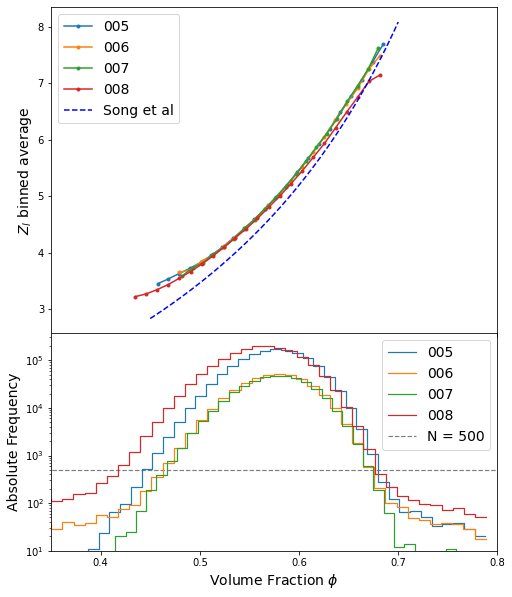

In [7]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (8,10), sharex = True, 
                               gridspec_kw={'hspace': 0.0, 'height_ratios': [3,2]})

N_limit = 500
for key in keys:
    mask = density_binned[key][0] > N_limit
    bin_centers, bin_means = z_phi_binned[key]
    ax1.plot(bin_centers[mask], bin_means[mask], label = key, marker = '.')
    ax2.step(density_binned[key][1][:-1], density_binned[key][0], label = key, linewidth = 1.2)
    
def makse(x):
    return 2*np.sqrt(3)*x/(1-x)

ax2.set_yscale('log')
x = np.linspace(0.45, 0.7, 50)
ax1.plot(x, makse(x), 'b--', label = 'Song et al')
ax1.legend(fontsize = 14)
ax1.set_ylabel('$Z_l$ binned average', fontsize = 14)

ax2.set_ylim(bottom = 10)
ax2.set_xlabel('Volume Fraction $\phi$', fontsize = 14)
ax2.set_ylabel('Absolute Frequency', fontsize = 14)
ax2.hlines(500, 0.3, 0.8, colors= 'Black', linestyles='--', linewidth = 1.2, alpha = 0.5, label =  f'N = {N_limit}')
ax2.legend(fontsize = 14)

plt.xlim(0.35, 0.8)
plt.savefig('contact_distribution.pdf')

In [35]:
index = np.where(density_binned[meas_key][0] > 500)
density_binned[meas_key][0] > 500
bin_means[index]

array([3.2199688 , 3.26887967, 3.34559114, 3.43566904, 3.54782255,
       3.66616948, 3.79580718, 3.94010267, 4.09449539, 4.26077411,
       4.4255184 , 4.60590081, 4.80293505, 5.00117211, 5.22151227,
       5.44393674, 5.68834824, 5.93312633, 6.21014215, 6.49072499,
       6.75894052, 7.03417753, 7.14763636])

In [129]:
#plt.scatter(df.x, df.w010_x/df.w000)
df_spec = df.loc[[i for i in df.index if '008_009' in i]]
plt.figure(figsize = (12,8))
#plt.scatter(df_spec.r, df_spec.z, c = df_spec.lpf, marker = '.', cmap = 'hot')
#plt.colorbar()
#plt.scatter(df_cut.cc_0_x, df_cut.cc_0_y)
#plt.scatter(df.w010_x/df.w000, df.w010_y/df.w000, marker = '.')
from scipy import fftpack, ndimage
#image = ndimage.imread('image2.jpg', flatten=True)     # flatten=True gives a greyscale image
image = df_spec[['r', 'z']].values
fft2 = fftpack.fft2(image)

plt.imshow(fft2)
plt.show()

In [185]:
from sklearn.preprocessing import StandardScaler
min_fun = df.columns[:4].tolist()
min_ev = df.columns[16:34].tolist()
imt = df.columns[38:52].tolist()
com = [i for i in df.columns if 'com' in i]
curv_cen = [i for i in df.columns if 'cc' in i]
custom = ['nn', 'lpf']
features = min_fun + min_ev + imt + com + curv_cen + custom

In [144]:
scaler = StandardScaler()
df_x = pd.DataFrame(scaler.fit_transform(df_cut[features]), columns = features)
df_y = df_cut.contact_number

In [149]:
from sklearn.linear_model import LogisticRegression
lre = LogisticRegression(solver = 'saga')
lre.fit(df_x, df_y)

In [150]:
lre.score(df_x[custom], df_y)

In [152]:
df_y.loc[df_y == 5].shape[0]/df_y.shape[0]

In [39]:
from scipy.spatial import KDTree
data = np.array([[0,0],[.5,.5], [1,0],[0,1],[1,1]])
data2 = data[:2]
r = np.linspace(0,2,40)
tree = KDTree(data)
tree2 = KDTree(data2)

In [40]:
tree.count_neighbors(tree2, r), tree2.count_neighbors(tree, r)

(array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  7,  7,  7,
         7,  7,  7,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10]),
 array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  7,  7,  7,
         7,  7,  7,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10]))

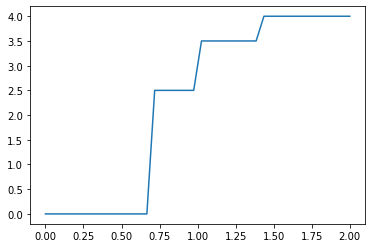

In [41]:
plt.plot(r, tree.count_neighbors(tree2, r)/data2.shape[0]-1)

array([[0, 0]])

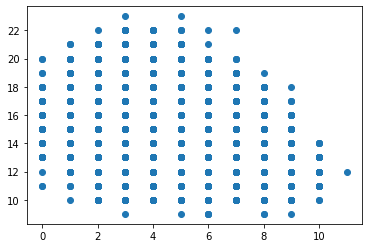

In [5]:
plt.scatter(df.contact_number, df.nn, alpha = 0.5)

In [48]:
Z = np.arange(df.contact_number.unique().min(), df.contact_number.unique().max())
N = np.arange(df.nn.unique().min(), df.nn.unique().max())

#for z in Z:
#    df_temp = df.loc[df.z == z, 'nn']
#    for n in N:
        

In [21]:
df_temp = df.loc[df.contact_number == 4, 'nn']

In [23]:
df_temp.loc[df_temp]

In [30]:
#z = 3 , n = 12


10430

In [138]:
Z = np.arange(2,10)
N = np.arange(10,22)
cont = []
near = []
size = []
for z in Z:
    for n in N:
        z_mask = df.contact_number == z
        n_mask = df.nn == n
        s = np.all([z_mask, n_mask], axis = 0).sum()
        size.append(s)
        near.append(n)
        cont.append(z)

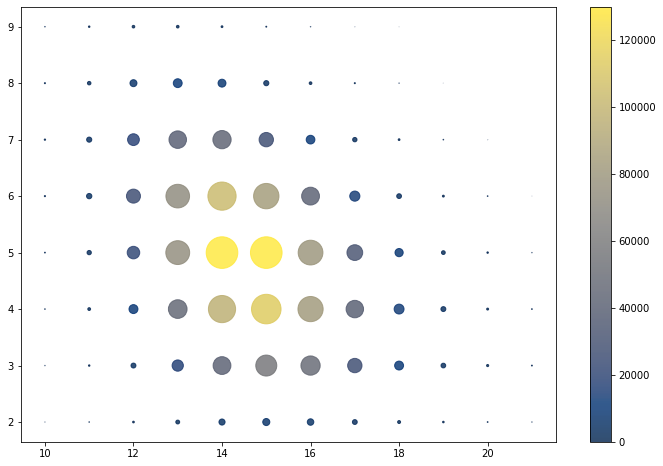

In [139]:
plt.figure(figsize = (12,8))
plt.scatter(near, cont, s = 1000*np.array(size)/np.array(size).max(), c = size, alpha = 0.8, cmap = 'cividis')
plt.colorbar()

array([0.00000000e+00, 0.00000000e+00, 1.54110513e-05, 7.70552563e-06,
       1.15582884e-04, 2.77398923e-04, 2.92809974e-04, 2.46576820e-04,
       1.92638141e-04, 4.62331538e-05, 1.54110513e-05, 1.54110513e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.70552563e-06,
       2.31165769e-05, 1.84932615e-04, 8.39902294e-04, 2.51200136e-03,
       3.36731470e-03, 2.69693397e-03, 1.58733828e-03, 6.24147576e-04,
       1.54110513e-04, 5.39386794e-05, 2.31165769e-05, 0.00000000e+00,
       0.00000000e+00, 6.93497307e-05, 3.39043128e-04, 3.04368262e-03,
       1.50411860e-02, 3.75721430e-02, 5.03247879e-02, 4.24651518e-02,
       2.33169206e-02, 8.90758763e-03, 2.60446766e-03, 6.31853102e-04,
       1.61816038e-04, 7.70552563e-06, 7.70552563e-06, 1.69521564e-04,
       2.16525270e-03, 2.45189826e-02, 1.27457099e-01, 3.16596932e-01,
       4.40679011e-01, 3.71321575e-01, 2.06076578e-01, 7.99140063e-02,
       2.20378033e-02, 4.62331538e-03, 8.47607820e-04, 1.23288410e-04,
      